In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Data Preprocessing
df = pd.read_csv('Mall_Customers.csv')
X = df.iloc[:, [3, 4]].values
# Dalam clustering, tidak ada dependent variable

# Columns of "Mall_Customers.csv" :
# Gender : Gender of the customer
# Age : Age of the customer
# Annual Income (k$) : Annual Income of the customer
# Spending Score (1-100) : Score assigned by the mall based on customer behavior and spending nature

# Dalam nb ini, hanya diambil 2 kolom yaitu Annual Income dan Spending Score

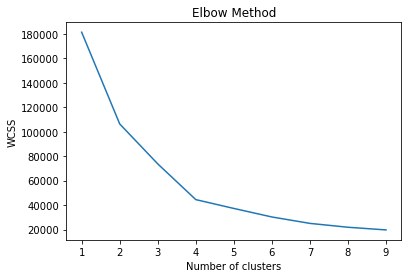

In [15]:
from sklearn.cluster import KMeans

# Finding best number of clusters using Elbow Method

wcssList = []
for i in range(1,10) :
    newCluster = KMeans(n_clusters=i+1, init='k-means++', random_state=42)
    newCluster.fit(X)
    wcssList.append(newCluster.inertia_)

plt.plot(range(1,10), wcssList)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Best number of cluster is 5

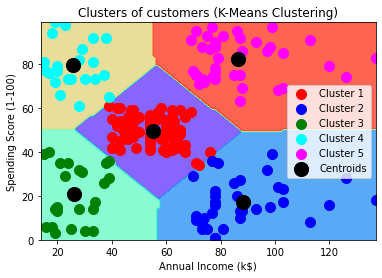

In [16]:
# Visualizing the clusters
cluster = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster.fit(X)

# Plotting area colors
x1, x2 = np.meshgrid(np.arange(start=X[:, 0].min()-1, stop=X[:, 0].max()+1, step=1),
                        np.arange(start=X[:, 1].min()-1, stop=X[:, 1].max()+1, step=1))
plt.contourf(x1, x2, cluster.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap='rainbow')

# Plotting the clusters
plt.scatter(X[cluster.labels_ == 0, 0], X[cluster.labels_ == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[cluster.labels_ == 1, 0], X[cluster.labels_ == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[cluster.labels_ == 2, 0], X[cluster.labels_ == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[cluster.labels_ == 3, 0], X[cluster.labels_ == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[cluster.labels_ == 4, 0], X[cluster.labels_ == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plotting the centroids
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], s=200, c='black', label='Centroids')

# Plotting the title and axis
plt.title('Clusters of customers (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()